<a href="https://colab.research.google.com/github/dhruvshah01/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

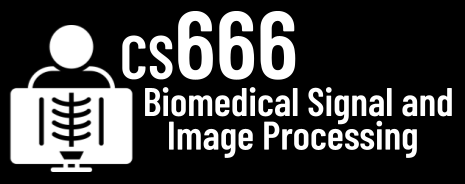

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (5 pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.2/142.2 kB 2.7 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [3]:
!wget https://cs666.org/data/ecg.txt

--2024-02-13 17:22:35--  https://cs666.org/data/ecg.txt
Resolving cs666.org (cs666.org)... 185.199.110.153, 185.199.111.153, 185.199.108.153, ...
Connecting to cs666.org (cs666.org)|185.199.110.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 105085 (103K) [text/plain]
Saving to: ‘ecg.txt’

ecg.txt             100%[===================>] 102.62K  --.-KB/s    in 0.01s   

2024-02-13 17:22:35 (7.94 MB/s) - ‘ecg.txt’ saved [105085/105085]



In [11]:
import biosppy

In [12]:
from biosppy import storage
signal, metadata = storage.load_txt('ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [7]:
SAMPLING_RATE = 1000 ### TODO!
DATA_POINTS = 15000
SECONDS = DATA_POINTS/SAMPLING_RATE ### TODO!

**Task 4** (15 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

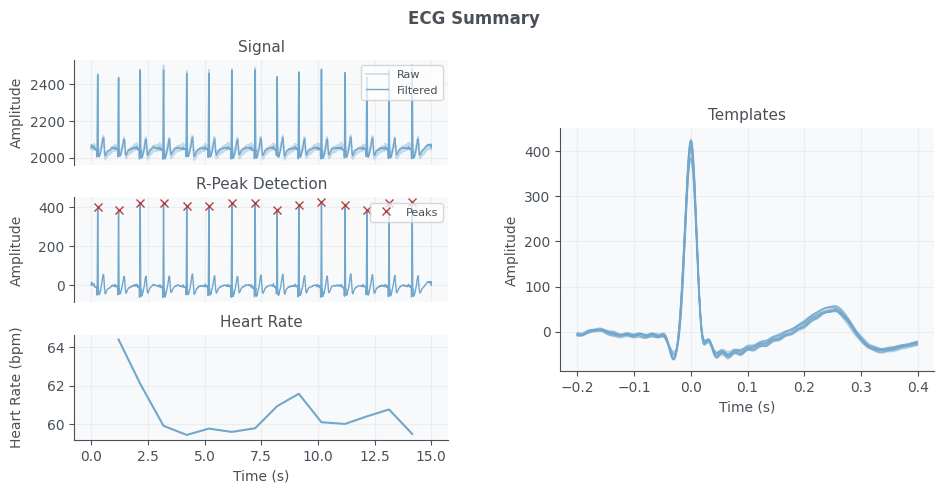

In [14]:
signal_filtered = biosppy.signals.ecg.ecg(signal = signal, sampling_rate = SAMPLING_RATE, show = True)

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

In [18]:
import matplotlib.pyplot as plt

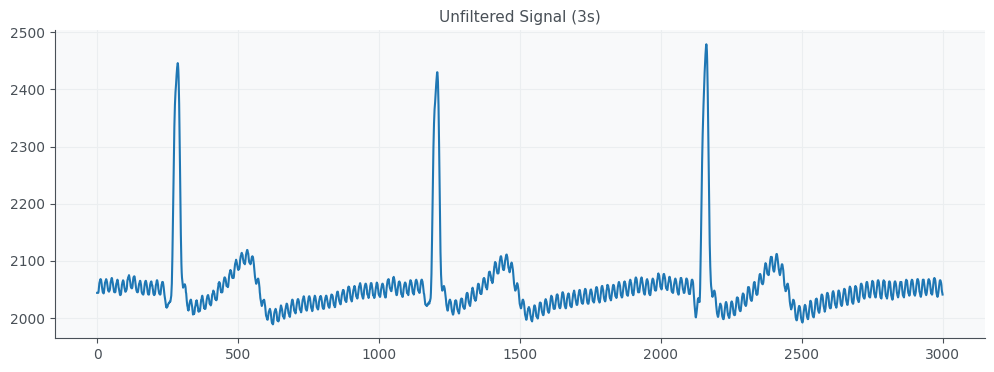

In [28]:
### TODO plot unfiltered signal
plt.figure(figsize=[12, 4])
plt.plot(signal[:3*SAMPLING_RATE])
plt.title('Unfiltered Signal (3s)')
plt.show()

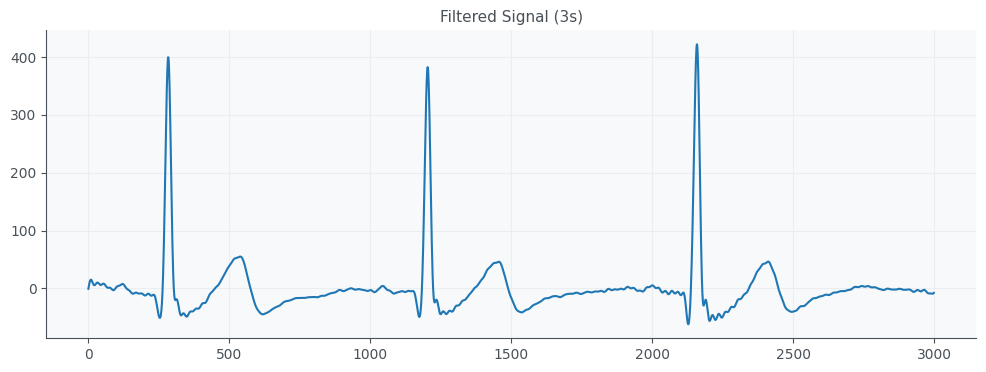

In [29]:
### TODO plot filtered signal
plt.figure(figsize=[12, 4])
plt.plot(signal_filtered[1][:3*SAMPLING_RATE])
plt.title('Filtered Signal (3s)')
plt.show()

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

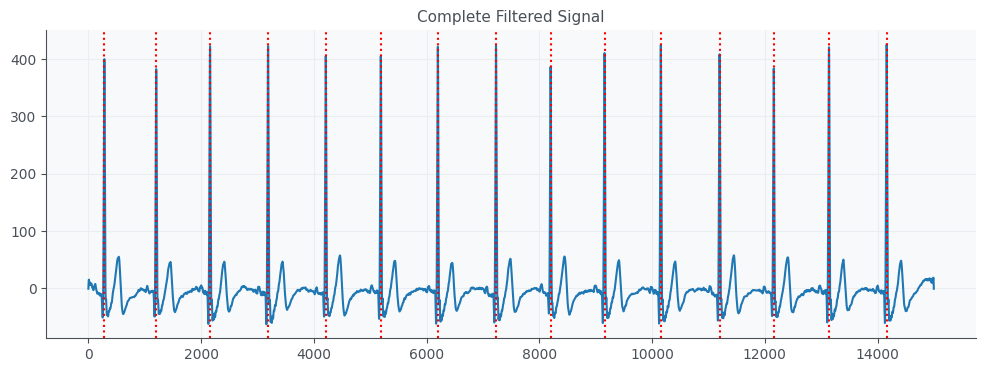

In [37]:
### TODO
plt.figure(figsize = [12, 4])
plt.plot(signal_filtered[1])
plt.title('Complete Filtered Signal')

for r_peak in signal_filtered[2]:
  plt.axvline(x = r_peak, color = 'r', ls=':')

plt.show()


**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [5]:
!pip install neurokit2
import neurokit2 as nk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.1 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

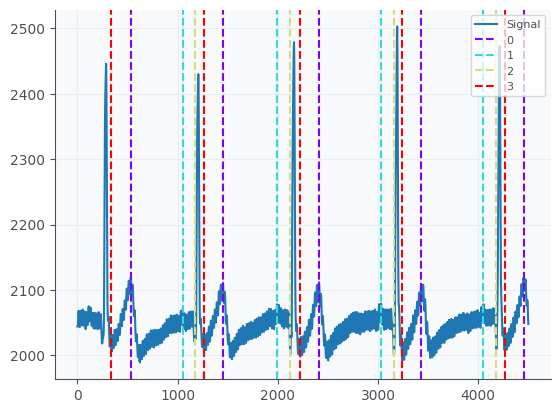

In [48]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(signal, signal_filtered[2], sampling_rate=SAMPLING_RATE, method="peak")
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'][:5],
                       waves_peak['ECG_P_Peaks'][:5],
                       waves_peak['ECG_Q_Peaks'][:5],
                       waves_peak['ECG_S_Peaks'][:5]], signal[:4500])

In [ ]:
# TODO Does the detection work well?


**Task 9** (10 pts): Use the sleepecg library to find the R Peaks.

In [49]:
!pip install sleepecg --q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.7/2.7 MB 8.8 MB/s eta 0:00:00


In [54]:
import sleepecg

In [62]:
# We have the R spikes/peaks now from Biosppy from above but there is another
# library called sleepecg.
# TODO Please install it and run the rpeak detection!
# Docs: https://sleepecg.readthedocs.io/en/stable/
from sleepecg import detect_heartbeats
r_peaks = sleepecg.detect_heartbeats(signal, fs=SAMPLING_RATE)

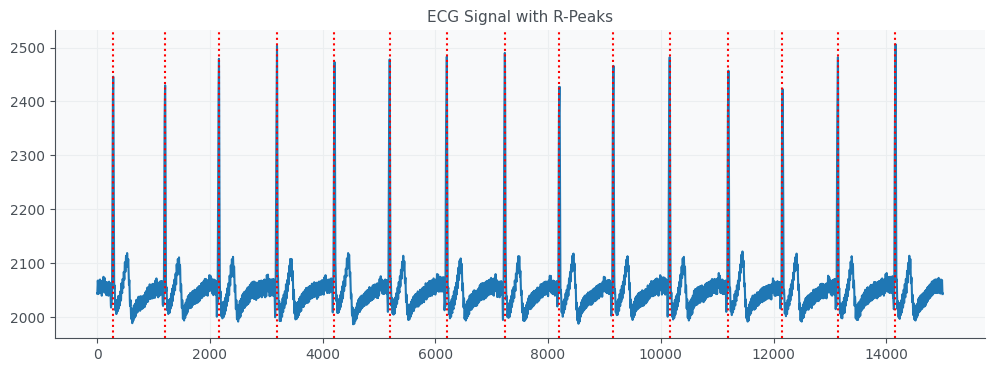

In [63]:
plt.figure(figsize=[12, 4])
plt.plot(signal)
plt.title('ECG Signal with R-Peaks')
for rpeak in r_peaks:
    plt.axvline(x=rpeak, color='r', ls=':')
plt.show()


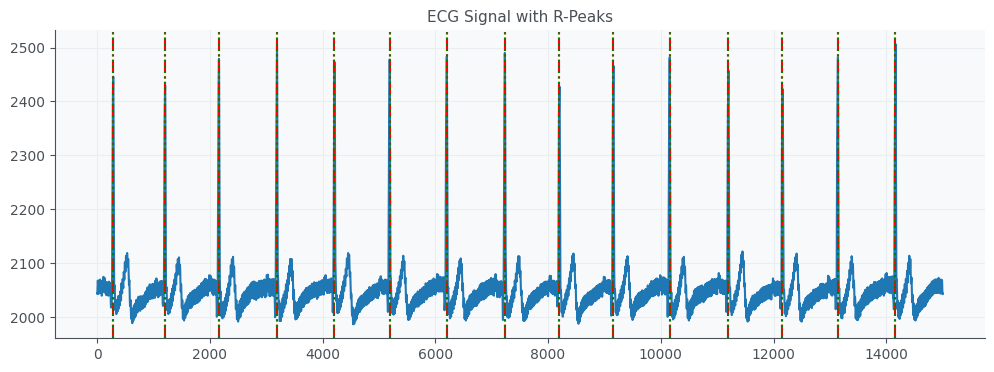

In [64]:
# TODO Do Biosppy and sleepecg give different rpeaks? Please calculate the MSE!
plt.figure(figsize=[12, 4])
plt.plot(signal)
plt.title('ECG Signal with R-Peaks')
for rpeak in r_peaks:
    plt.axvline(x=rpeak, color='r', ls='-.')
for rpeak in signal_filtered[2]:
    plt.axvline(x=rpeak, color='g', ls=':')
plt.show()

It doesn't look like the r-peaks given are different from naked eye. However MSE calculation do represent some differences.

In [65]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(r_peaks, signal_filtered[2])
print("Mean squared error:", mse)

Mean squared error: 0.2


**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

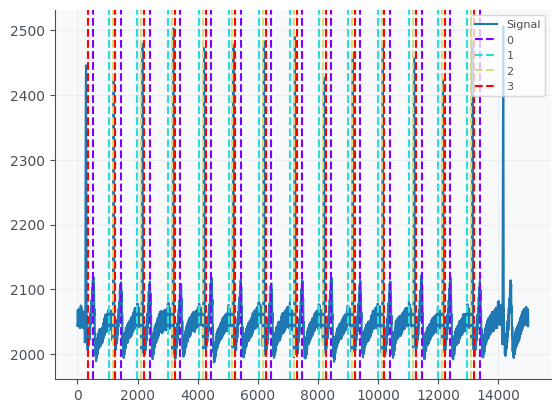

In [66]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal
# Delineate the ECG signal
_, waves_peak = nk.ecg_delineate(signal, signal_filtered[2], sampling_rate=SAMPLING_RATE, method="peak")
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)

Just Playing around with ecg_delineate

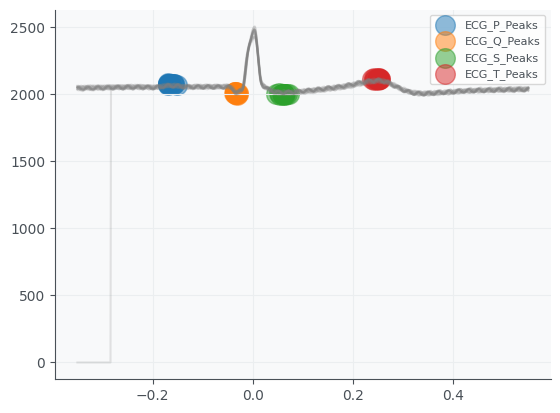

In [67]:
_, waves_peak = nk.ecg_delineate(signal,
                                 r_peaks,
                                 sampling_rate=SAMPLING_RATE,
                                 method="peak",
                                 show=True,
                                 show_type='peaks')

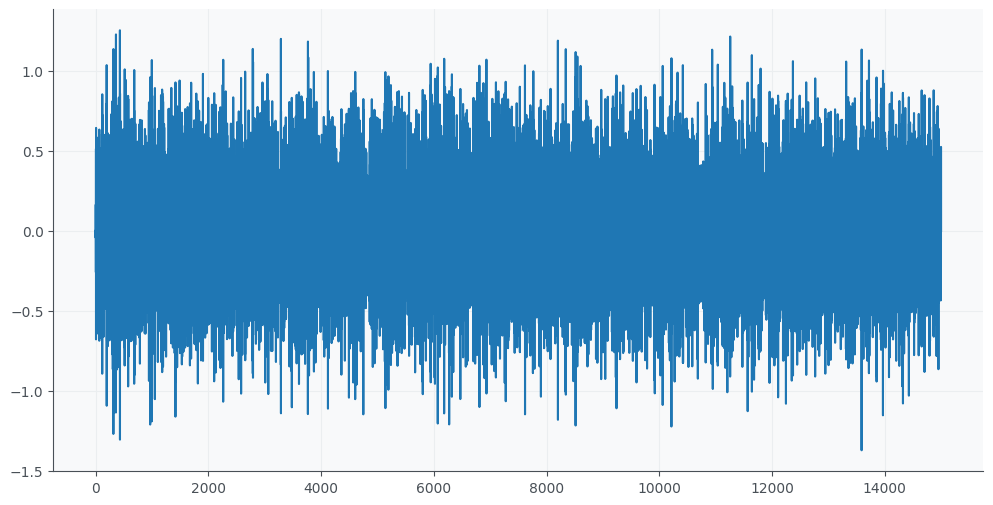

In [72]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass.
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.
low_cut_filter_300 = nk.signal_filter(signal, sampling_rate = SAMPLING_RATE, lowcut = 300)
plt.figure(figsize = [12, 6])
plt.plot(low_cut_filter_300)

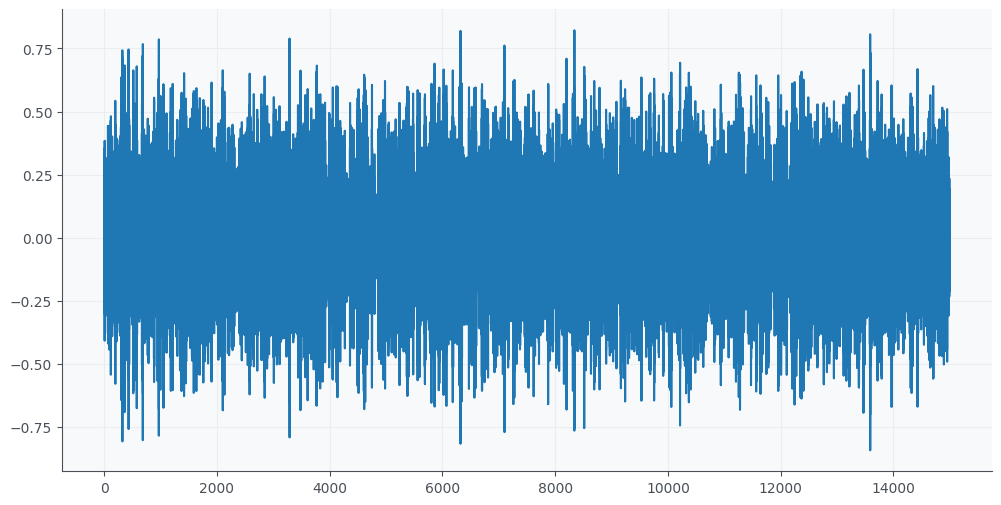

In [75]:
low_cut_filter_400 = nk.signal_filter(signal, sampling_rate = SAMPLING_RATE, lowcut = 400)
plt.figure(figsize = [12, 6])
plt.plot(low_cut_filter_400)

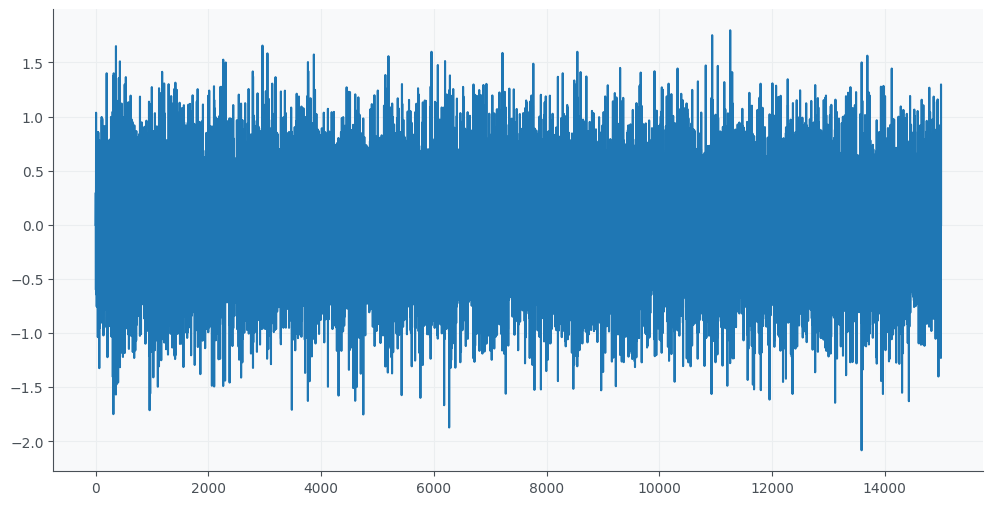

In [76]:
low_cut_filter_200 = nk.signal_filter(signal, sampling_rate = SAMPLING_RATE, lowcut = 200)
plt.figure(figsize = [12, 6])
plt.plot(low_cut_filter_200)

In [79]:
# low_cut_filters
low_cut_filter_50 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=50)
low_cut_filter_100 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=100)
low_cut_filter_150 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=150)
low_cut_filter_200 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=200)
low_cut_filter_250 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=250)
low_cut_filter_300 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=300)
low_cut_filter_350 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=350)
low_cut_filter_400 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=400)


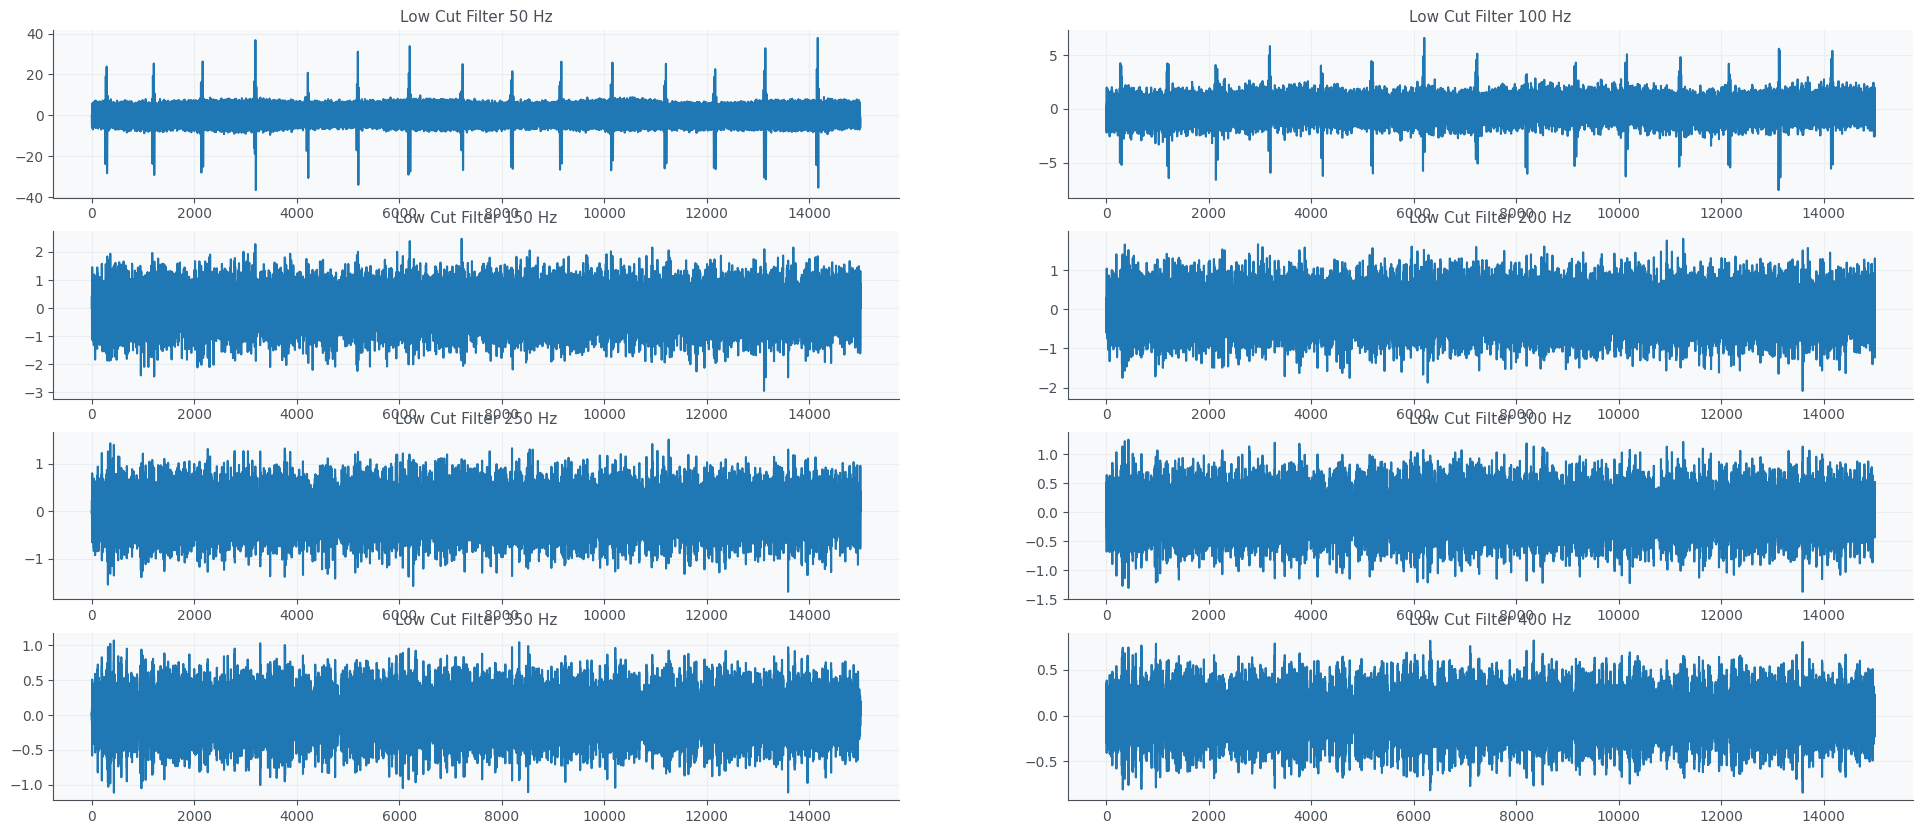

In [82]:
# prompt: Can you subplot the low_cut_filter, I have above with lowcut = 50, 100, 150, 200, 250, 300, 350, 400. Also create the filter using nk.filter_signal too

plt.figure(figsize=[24, 10])
plt.subplot(4, 2, 1)
plt.plot(low_cut_filter_50)
plt.title('Low Cut Filter 50 Hz')
plt.subplot(4, 2, 2)
plt.plot(low_cut_filter_100)
plt.title('Low Cut Filter 100 Hz')
plt.subplot(4, 2, 3)
plt.plot(low_cut_filter_150)
plt.title('Low Cut Filter 150 Hz')
plt.subplot(4, 2, 4)
plt.plot(low_cut_filter_200)
plt.title('Low Cut Filter 200 Hz')
plt.subplot(4, 2, 5)
plt.plot(low_cut_filter_250)
plt.title('Low Cut Filter 250 Hz')
plt.subplot(4, 2, 6)
plt.plot(low_cut_filter_300)
plt.title('Low Cut Filter 300 Hz')
plt.subplot(4, 2, 7)
plt.plot(low_cut_filter_350)
plt.title('Low Cut Filter 350 Hz')
plt.subplot(4, 2, 8)
plt.plot(low_cut_filter_400)
plt.title('Low Cut Filter 400 Hz')
plt.show()

In [84]:
# low_cut_filters
high_cut_filter_50 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, highcut=50)
high_cut_filter_100 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, highcut=100)
high_cut_filter_150 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, highcut=150)
high_cut_filter_200 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, highcut=200)
high_cut_filter_250 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, highcut=250)
high_cut_filter_300 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, highcut=300)
high_cut_filter_350 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, highcut=350)
high_cut_filter_400 = nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, highcut=400)


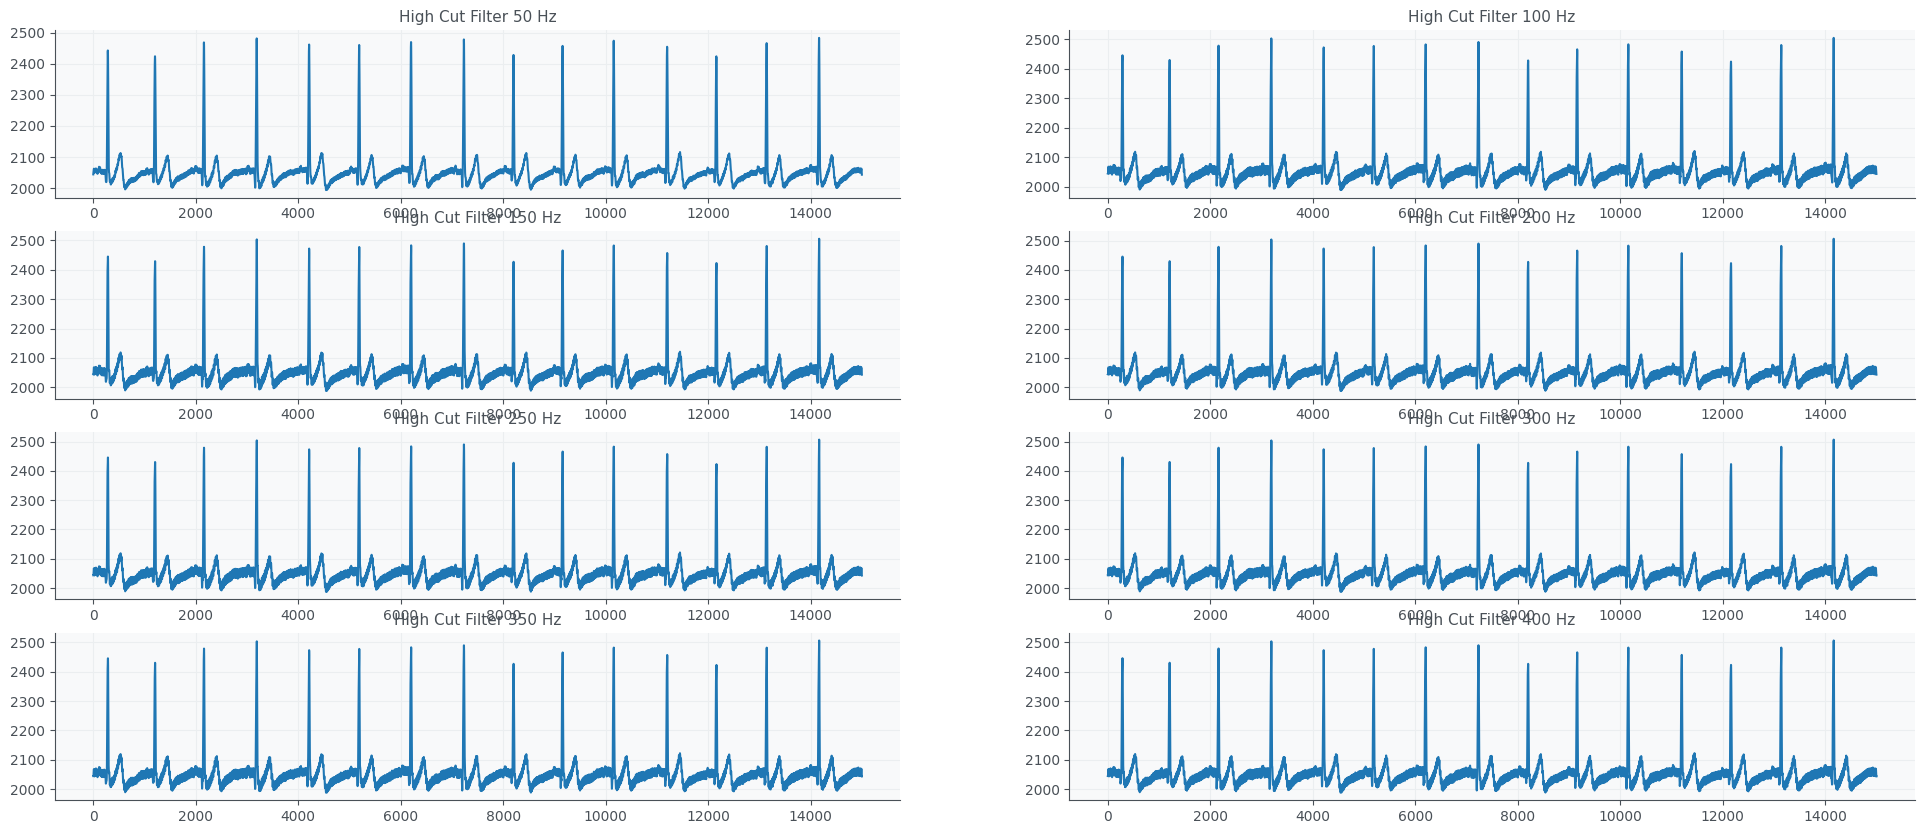

In [85]:
plt.figure(figsize=[24, 10])
plt.subplot(4, 2, 1)
plt.plot(high_cut_filter_50)
plt.title('High Cut Filter 50 Hz')
plt.subplot(4, 2, 2)
plt.plot(high_cut_filter_100)
plt.title('High Cut Filter 100 Hz')
plt.subplot(4, 2, 3)
plt.plot(high_cut_filter_150)
plt.title('High Cut Filter 150 Hz')
plt.subplot(4, 2, 4)
plt.plot(high_cut_filter_200)
plt.title('High Cut Filter 200 Hz')
plt.subplot(4, 2, 5)
plt.plot(high_cut_filter_250)
plt.title('High Cut Filter 250 Hz')
plt.subplot(4, 2, 6)
plt.plot(high_cut_filter_300)
plt.title('High Cut Filter 300 Hz')
plt.subplot(4, 2, 7)
plt.plot(high_cut_filter_350)
plt.title('High Cut Filter 350 Hz')
plt.subplot(4, 2, 8)
plt.plot(high_cut_filter_400)
plt.title('High Cut Filter 400 Hz')
plt.show()

Definitely feels like High-Cut Filter works good!

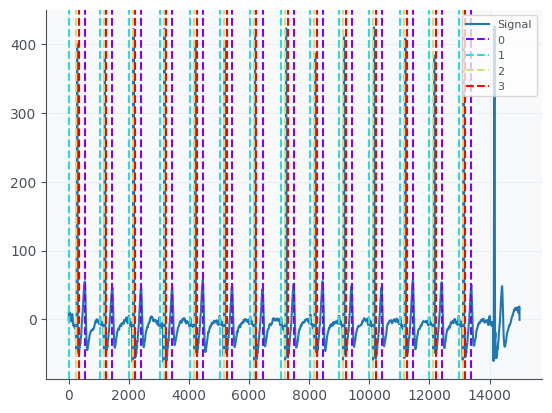

In [86]:
# Finally, run the delineation on the filtered signal from BioSPPY.
_, waves_peak = nk.ecg_delineate(signal_filtered[1], signal_filtered[2], sampling_rate=SAMPLING_RATE, method="peak")
# Zooming into the first 3 R-peaks, with focus on T_peaks, P-peaks, Q-peaks and S-peaks
plot = nk.events_plot([waves_peak['ECG_T_Peaks'],
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal_filtered[1])



In [ ]:
# TODO Which one works the best?

Filtered Signal gives sharper peaks and is easy to identify the P-Q-R-S-T peaks

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#